# Women In Conservation Technology 20th November 2022

!['All logos'](./logos/joint_logos.PNG)


# Manual Annotation

We collect 200 to 400 images per week.

Human annotation is laborious, automatic detection of what animal is in what image or video as shown prior to this.

Also, if we are at larger scales say collection of thousands, tens of thousands or hundred of thousands of images manual annotation will become unreasonable.

# Automatic Impala and Zebra Detection in Images and Videos

70 % of the images with animals have either an impala or a zebra 

We could also do automatic false trigger or non-animal trigger detection since 60% to 80% of the raw unpublished data  was either a false trigger or triggered by a human. 

The purpose here is to locate the animal in images and videos, detect which animal it is then verify.  

In [2]:
#file and folder libraries
import pandas as pd
import numpy as np
import os
#Mapping libraries
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Import specific function 'from_epsg' from fiona module
from fiona.crs import from_epsg

#tensorflow related
from keras.models import load_model
from PIL import Image

tf_model = load_model('mobilenet.h5')
def verify_image(source):
    mapping = {
    0.0 : 'IMPALA',
    1.0 : 'OTHER',
    2.0: 'ZEBRA'

    }
    img = Image.open(source)
    size = (128,128)
    img = img.resize(size)
    img = np.expand_dims(img,axis=0)
    prediction = tf_model.predict(img)[0]
    return mapping[prediction.argmax()]

def verify_array(source):
    mapping = {
    0.0 : 'IMPALA',
    1.0 : 'OTHER',
    2.0: 'ZEBRA'

    }
    size = (128,128)
    #img = source.resize(size)
    img = np.resize(source,(128,128,3))
    img = np.expand_dims(img,axis=0)
    prediction = tf_model.predict(img)[0]
    return mapping[prediction.argmax()]


#pytorch related
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

C:\Users\Yuri\anaconda3\envs\olpejeta20thNov2022\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [4]:
#load animal detection model
model = torch.hub.load('ultralytics/yolov5', 'custom', path=r'best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Yuri/.cache\torch\hub\master.zip
YOLOv5  2022-11-18 Python-3.10.6 torch-1.13.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients
Adding AutoShape... 


In [5]:
model.conf = 0.45

In [6]:
def detect_and_verify(source):
    img = (source)#('dataset/images/a.jpg')
    results = model(img)
    results.print()

    %matplotlib inline 
    plt.imshow(np.squeeze(results.render()))
    plt.show()

    print("Verification Model")
    for i in results.crop(save_dir = 'results',exist_ok=True):
        print(verify_array(i['im']))

In [7]:
def detect_class(source):
    img = (source)#('dataset/images/a.jpg')
    results = model(img)
    results.print()
    r = results.crop(save_dir = 'results',exist_ok=True)
    classes = []
    for i in r:
        classes.append(i['label'])
    return classes

In [8]:
detect_class('dataset/images/a.jpg')

image 1/1: 720x1280 1 zebra
Speed: 113.0ms pre-process, 835.6ms inference, 25.2ms NMS per image at shape (1, 3, 384, 640)
Saved 1 image to results
Saved results to results



['zebra 0.95']

image 1/1: 720x1280 1 zebra
Speed: 143.3ms pre-process, 1060.0ms inference, 5.2ms NMS per image at shape (1, 3, 384, 640)


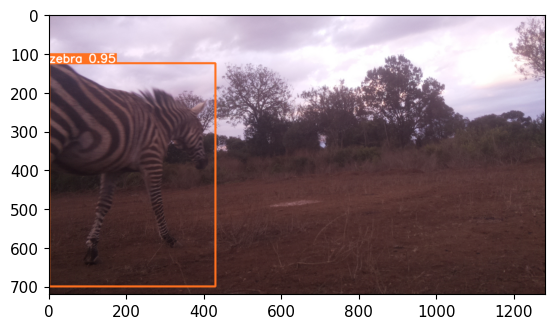

Saved 1 image to results
Saved results to results



Verification Model
1/1 [==============================] - 5s 5s/step
OTHER


In [9]:
detect_and_verify('dataset/images/a.jpg')

image 1/1: 720x1280 1 impala
Speed: 106.0ms pre-process, 868.2ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)


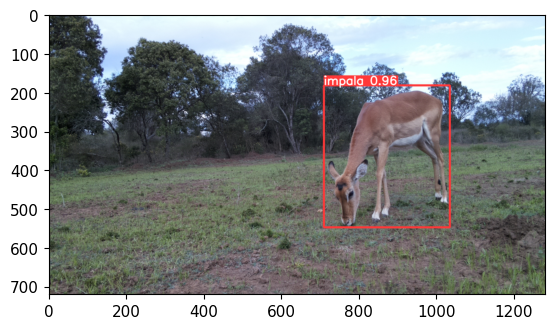

Saved 1 image to results
Saved results to results



Verification Model
1/1 [==============================] - 0s 113ms/step
OTHER


In [10]:
detect_and_verify('dataset/images/impala.jpg')

image 1/1: 720x1280 4 impalas
Speed: 67.8ms pre-process, 841.5ms inference, 8.7ms NMS per image at shape (1, 3, 384, 640)


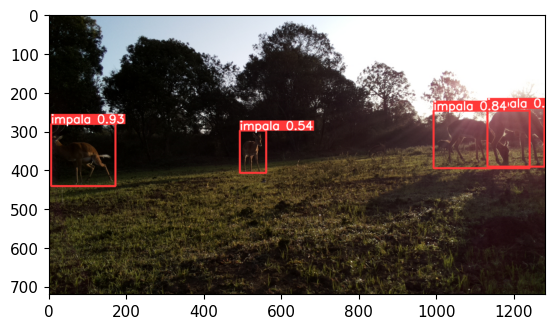

Saved 1 image to results
Saved results to results



Verification Model
1/1 [==============================] - 0s 145ms/step
OTHER
1/1 [==============================] - 0s 130ms/step
OTHER
1/1 [==============================] - 0s 93ms/step
OTHER
1/1 [==============================] - 0s 85ms/step
OTHER


In [11]:
detect_and_verify('dataset/images/impalas-warthogs.jpg')

image 1/1: 720x1280 1 monkey
Speed: 101.5ms pre-process, 759.7ms inference, 0.0ms NMS per image at shape (1, 3, 384, 640)


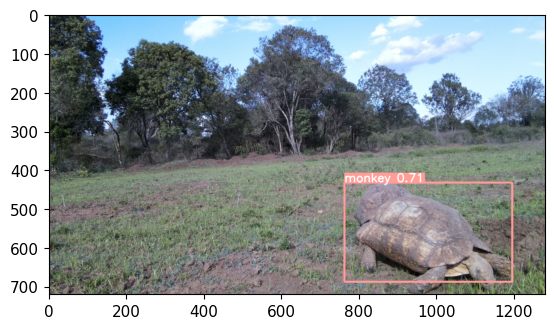

Saved 1 image to results
Saved results to results



Verification Model
1/1 [==============================] - 0s 74ms/step
OTHER


In [12]:
detect_and_verify(r'dataset\images\tortoise.jpg')

image 1/1: 720x1280 1 impala
Speed: 66.9ms pre-process, 629.5ms inference, 3.7ms NMS per image at shape (1, 3, 384, 640)


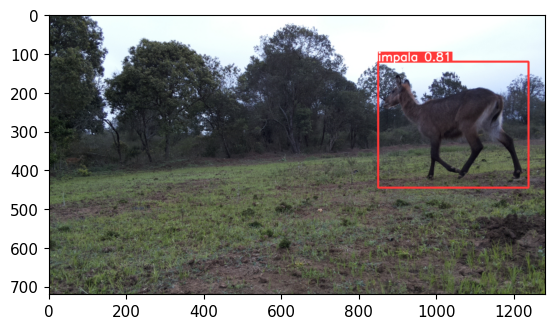

Saved 1 image to results
Saved results to results



Verification Model
1/1 [==============================] - 0s 82ms/step
OTHER


In [13]:
detect_and_verify('dataset/images/waterbuck.jpg')

image 1/1: 720x1280 1 zebra
Speed: 80.0ms pre-process, 624.3ms inference, 2.0ms NMS per image at shape (1, 3, 384, 640)


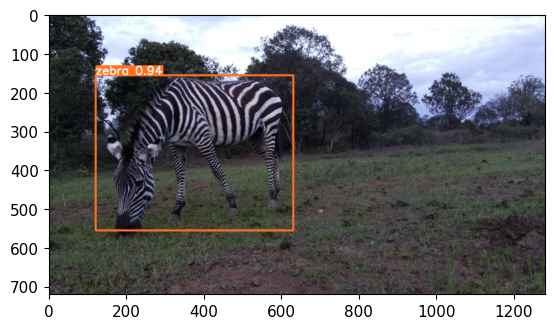

Saved 1 image to results
Saved results to results



Verification Model
1/1 [==============================] - 0s 80ms/step
OTHER


In [14]:
detect_and_verify(r'dataset/images/zebra.jpg')

image 1/1: 605x1200 1 impala, 3 monkeys, 1 zebra
Speed: 52.0ms pre-process, 264.0ms inference, 2.0ms NMS per image at shape (1, 3, 352, 640)


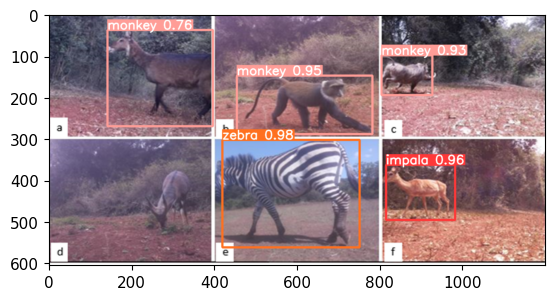

Saved 1 image to results
Saved results to results



Verification Model
1/1 [==============================] - 0s 36ms/step
OTHER
1/1 [==============================] - 0s 33ms/step
OTHER
1/1 [==============================] - 0s 34ms/step
OTHER
1/1 [==============================] - 0s 43ms/step
OTHER
1/1 [==============================] - 0s 32ms/step
OTHER


In [17]:
detect_and_verify('DSAIL-Porini.PNG')

image 1/1: 720x1280 1 zebra
Speed: 48.0ms pre-process, 281.0ms inference, 2.0ms NMS per image at shape (1, 3, 384, 640)


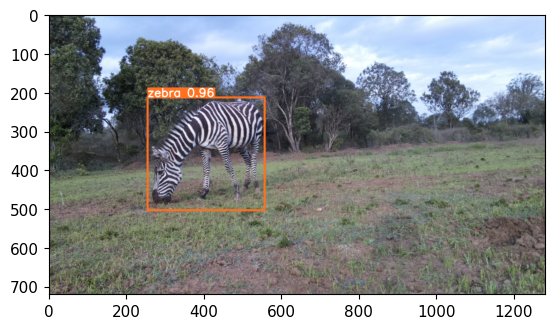

Saved 1 image to results
Saved results to results



Verification Model
1/1 [==============================] - 0s 35ms/step
OTHER


In [18]:
detect_and_verify('dataset/images/zebra2.jpg')

image 1/1: 720x1280 1 zebra
Speed: 38.0ms pre-process, 473.0ms inference, 2.0ms NMS per image at shape (1, 3, 384, 640)


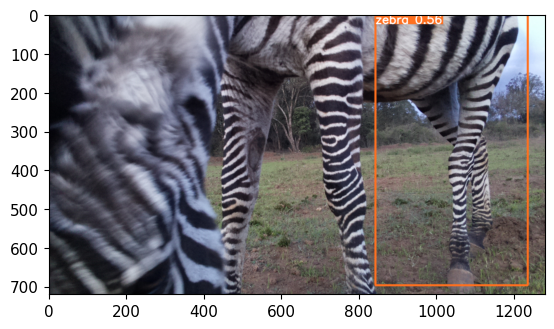

Saved 1 image to results
Saved results to results



Verification Model
1/1 [==============================] - 0s 35ms/step
OTHER


In [19]:
detect_and_verify(r'dataset\images\zebra3.jpg')

In [21]:
#on multiple images
#400 images with impalas or zebras
df_auto = pd.DataFrame()
Species = []
source = './dataset/data/zebras_impalas/'
Filenames = os.listdir(source)
files = []
for image in Filenames[:10]:
    try:
        Species.append(detect_class(source+image))
        files.append(image)
    except:
        pass
df_auto['Filename'] = files
df_auto['Species'] = Species
df_auto.head()

image 1/1: 720x1280 3 impalas
Speed: 34.0ms pre-process, 292.0ms inference, 0.0ms NMS per image at shape (1, 3, 384, 640)
Saved 1 image to results
Saved results to results

image 1/1: 720x1280 2 impalas
Speed: 36.0ms pre-process, 255.0ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)
Saved 1 image to results
Saved results to results

image 1/1: 720x1280 1 impala
Speed: 44.0ms pre-process, 270.0ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)
Saved 1 image to results
Saved results to results

image 1/1: 720x1280 (no detections)
Speed: 46.0ms pre-process, 248.0ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)
Saved 1 image to results
Saved results to results

image 1/1: 720x1280 2 impalas
Speed: 56.0ms pre-process, 488.0ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)
Saved 1 image to results
Saved results to results

image 1/1: 720x1280 2 zebras
Speed: 40.0ms pre-process, 290.0ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)
Saved 1 i

,Filename,Species
0,2021-07-09-06-40-57.jpg,"[impala 0.90, impala 0.96, impala 0.97]"
1,2021-08-14-12-54-51.jpg,"[impala 0.55, impala 0.92]"
2,2021-09-05-10-30-00.jpg,[impala 0.98]
3,2021-09-18-10-48-36.jpg,[]
4,2021-09-18-10-49-53.jpg,"[impala 0.69, impala 0.92]"


In [22]:
#200 images without impalas or zebras
#on multiple images
#400 images with impalas or zebras
df_auto = pd.DataFrame()
Species = []
source = './dataset/data/others/'
Filenames = os.listdir(source)
files = []
for image in Filenames[:10]:
    try:
        Species.append(detect_class(source+image))
        files.append(image)
    except:
        pass
df_auto['Filename'] = files
df_auto['Species'] = Species
df_auto.head()

image 1/1: 720x1280 (no detections)
Speed: 51.0ms pre-process, 275.0ms inference, 0.0ms NMS per image at shape (1, 3, 384, 640)
Saved 1 image to results
Saved results to results

image 1/1: 720x1280 (no detections)
Speed: 38.0ms pre-process, 267.0ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)
Saved 1 image to results
Saved results to results

image 1/1: 720x1280 3 impalas
Speed: 39.0ms pre-process, 244.0ms inference, 0.0ms NMS per image at shape (1, 3, 384, 640)
Saved 1 image to results
Saved results to results

image 1/1: 720x1280 3 impalas
Speed: 45.0ms pre-process, 251.0ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)
Saved 1 image to results
Saved results to results

image 1/1: 720x1280 (no detections)
Speed: 50.0ms pre-process, 424.0ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)
Saved 1 image to results
Saved results to results

image 1/1: 720x1280 (no detections)
Speed: 52.0ms pre-process, 291.0ms inference, 0.0ms NMS per image at shape (1, 3,

,Filename,Species
0,2021-06-25-14-59-42.jpg,[]
1,2021-06-25-15-01-08.jpg,[]
2,2021-06-25-15-01-38.jpg,"[impala 0.57, impala 0.75, impala 0.82]"
3,2021-06-25-15-02-43.jpg,"[impala 0.54, impala 0.55, impala 0.58]"
4,2021-06-25-15-23-14.jpg,[]


In [23]:
cap = cv2.VideoCapture(r"dataset\Zebras and Gazelles in Masai Mara National Park, Kenya - Video 1.mp4")
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    imshow_ = cv2.imshow('Detection of Zebras and Impalas', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# Geographical Tracking

- Disclaimer: Privacy

- Monitoring the presence of scat and it's freshness is important to understanding the general location of the animals and the location we place camera traps. Yet, for most locations we placed the camera traps in open spaces. 

[DROPPIINGS IMAGES] [TRAIL_IMAGE]

In [25]:
df = pd.read_csv('sightings.csv')

In [26]:
df.head()

,Location,Impala_count,Zebra_count,Other_count,Longitude,Latitude
0,"(36.962348, -0.390386)",11,0,50,36.962348,-0.390386
1,"(36.962331, -0.390386)",29,3,57,36.962331,-0.390386
2,"(36.961408, -0.388557)",2,0,137,36.961408,-0.388557
3,"(36.965402, -0.386616)",34,0,386,36.965402,-0.386616
4,"(36.964172, -0.386405)",93,0,4,36.964172,-0.386405


In [27]:
df.head()

,Location,Impala_count,Zebra_count,Other_count,Longitude,Latitude
0,"(36.962348, -0.390386)",11,0,50,36.962348,-0.390386
1,"(36.962331, -0.390386)",29,3,57,36.962331,-0.390386
2,"(36.961408, -0.388557)",2,0,137,36.961408,-0.388557
3,"(36.965402, -0.386616)",34,0,386,36.965402,-0.386616
4,"(36.964172, -0.386405)",93,0,4,36.964172,-0.386405


In [28]:
df['Location'].nunique()

18

In [29]:
for i, row in df.iterrows():
    print(row['Location'])

(36.962348, -0.390386)
(36.962331, -0.390386)
(36.961408, -0.388557)
(36.965402, -0.386616)
(36.964172, -0.386405)
(36.9625, -0.390772)
(36.962204, -0.39131)
(36.962063, -0.390381)
(36.962386, -0.390381)
(36.961391, -0.388557)
(36.962124, -0.390042)
(36.962036, -0.390224)
(36.965974, -0.386823)
(36.962479, -0.390381)
(36.964173, -0.386405)
(36.962578, -0.390807)
(36.964109, -0.386438)
(36.962333, -0.390381)


## Show Animal distribution across the conservancy

There were 30 deployments across 18 different locations of the conservancy

!['DeKUT conservancy'](./dataset/images/figures/conservancy.PNG)

In [30]:
newdata = gpd.GeoDataFrame()
print(newdata)

Empty GeoDataFrame
Columns: []
Index: []


In [31]:
# Create a new column called 'geometry' to the GeoDataFrame
newdata['geometry'] = None
# Let's again see what's inside
print(newdata)

Empty GeoDataFrame
Columns: [geometry]
Index: []


In [32]:
#Coordinates of the DeKUT Conservancy
#Create a Shapely polygon from the coordinate-tuple list
# Coordinates of the DeKUT Conservancy
a = (36.955565, -0.385988)
b = (36.958534, -0.386569)
c = (36.960551, -0.386576)
d = (36.961850, -0.386365)
e = (36.963217, -0.386202)
f = (36.965222, -0.386558)
g = (36.966931, -0.386739)
h = (36.967129, -0.388918)
i = (36.966454, -0.389073)
j = (36.965501, -0.390102)
k = (36.962775, -0.392138)
l = (36.961348, -0.391217)
m = (36.95975, -0.38957)
n = (36.956927, -0.389760)
o = (36.956281, -0.388087)
coordinates = [a,b,c,d,e,f,g,h,i,j,k,l,m,n,o]

# Create a Shapely polygon from the coordinate-tuple list
poly = Polygon(coordinates)

# Let's see what we have
#print(poly)

# Insert the polygon into 'geometry' -column at index 0
newdata.loc[0, 'geometry'] = poly

# Let's see what we have now
print(newdata)

# Add a new column and insert data
newdata.loc[0, 'location'] = 'DeKUT Conservancy'

# Let's check the data
print(newdata.crs)

# Set the GeoDataFrame's coordinate system to WGS84 (i.e. epsg code 4326)
newdata.crs = from_epsg(4326)

# Let's see how the crs definition looks like
print(newdata.crs)

                                            geometry
0  POLYGON ((36.95556 -0.38599, 36.95853 -0.38657...
None
+init=epsg:4326 +no_defs +type=crs


C:\Users\Yuri\anaconda3\envs\olpejeta20thNov2022\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [33]:
# Determine the output path for the Shapefile
outfp = "DeKUT_Conservancy.shp"

# Write the data into that Shapefile
newdata.to_file(outfp)

#path_to_data = geopandas.read_file(outfp)
gdf = gpd.read_file(outfp)

gdf

,location,geometry
0,DeKUT Conservancy,"POLYGON ((36.95556 -0.38599, 36.95853 -0.38657..."


In [34]:
gdf['area'] = gdf.area

gdf['area']

0    0.000042
Name: area, dtype: float64

In [36]:
gdf.explore("area", legend=False,tiles="OpenStreetMap")

C:\Users\Yuri\anaconda3\envs\olpejeta20thNov2022\lib\site-packages\mapclassify\classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam


In [37]:
gdf.centroid #POINT (36.96173 -0.38848)

0    POINT (36.96173 -0.38848)
dtype: geometry

In [38]:
gdf['centroid'] = gdf.centroid
gdf['centroid']

gdf = gdf.set_geometry("centroid")

In [48]:
dekut_conserv = gpd.read_file('DeKUT_Conservancy.shp')

<AxesSubplot:>

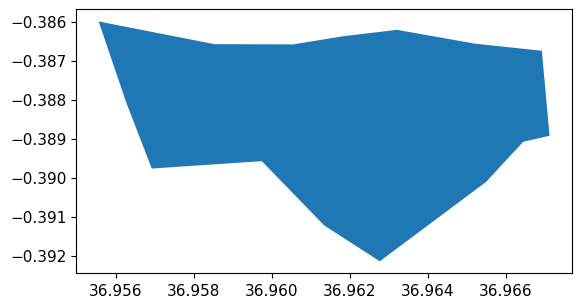

In [49]:
dekut_conserv.to_crs(epsg=4326).plot()

In [50]:
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
geo_df = gpd.GeoDataFrame(df, 
                          crs = crs, 
                          geometry = geometry)

C:\Users\Yuri\anaconda3\envs\olpejeta20thNov2022\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [51]:
geo_df.head()

,Location,Impala_count,Zebra_count,Other_count,Longitude,Latitude,geometry
0,"(36.962348, -0.390386)",11,0,50,36.962348,-0.390386,POINT (36.96235 -0.39039)
1,"(36.962331, -0.390386)",29,3,57,36.962331,-0.390386,POINT (36.96233 -0.39039)
2,"(36.961408, -0.388557)",2,0,137,36.961408,-0.388557,POINT (36.96141 -0.38856)
3,"(36.965402, -0.386616)",34,0,386,36.965402,-0.386616,POINT (36.96540 -0.38662)
4,"(36.964172, -0.386405)",93,0,4,36.964172,-0.386405,POINT (36.96417 -0.38640)


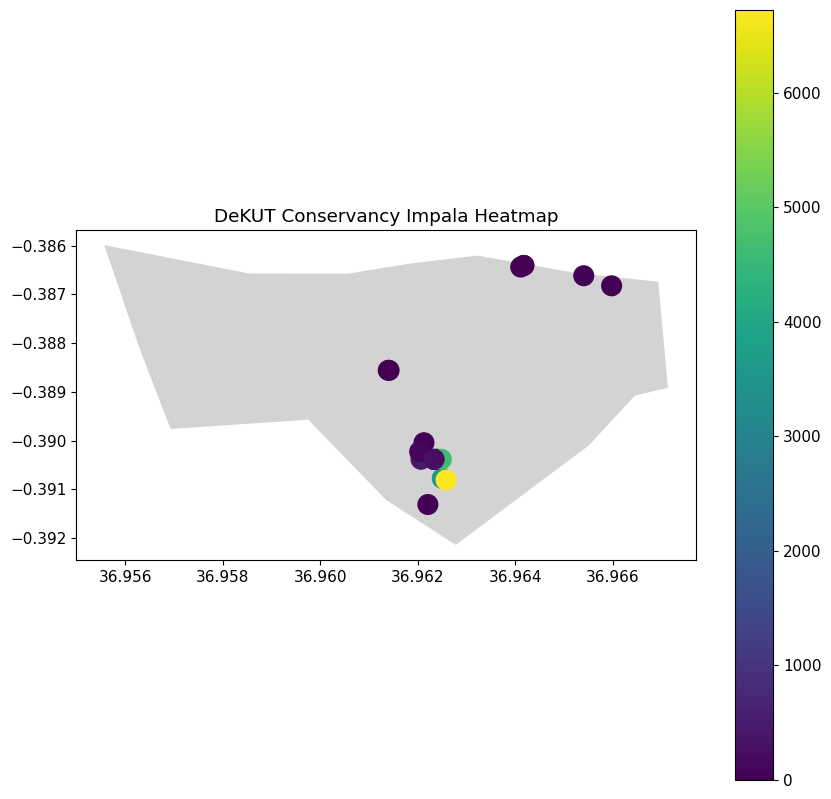

In [63]:
fig, ax = plt.subplots(figsize = (10,10))
dekut_conserv.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df.plot(column = 'Impala_count', ax=ax,
            legend = True, 
            markersize = 200)
ax.set_title('DeKUT Conservancy Impala Heatmap')
plt.savefig('Impala Heat Map')

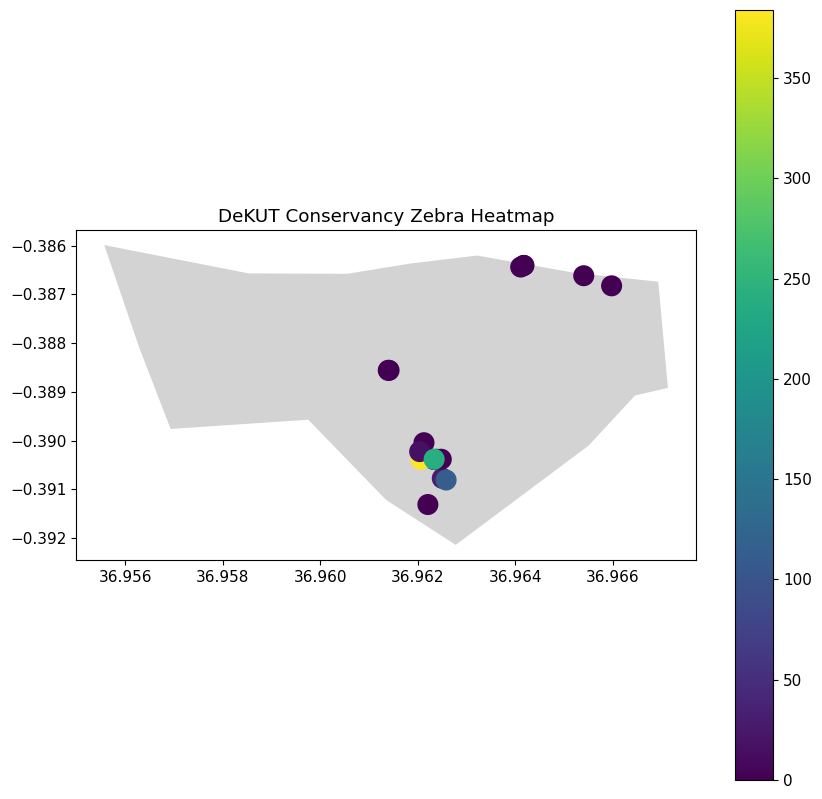

In [64]:
fig, ax = plt.subplots(figsize = (10,10))
dekut_conserv.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df.plot(column = 'Zebra_count', ax=ax,
            legend = True, 
            markersize = 200)
ax.set_title('DeKUT Conservancy Zebra Heatmap')
plt.savefig('Zebra Heat Map')

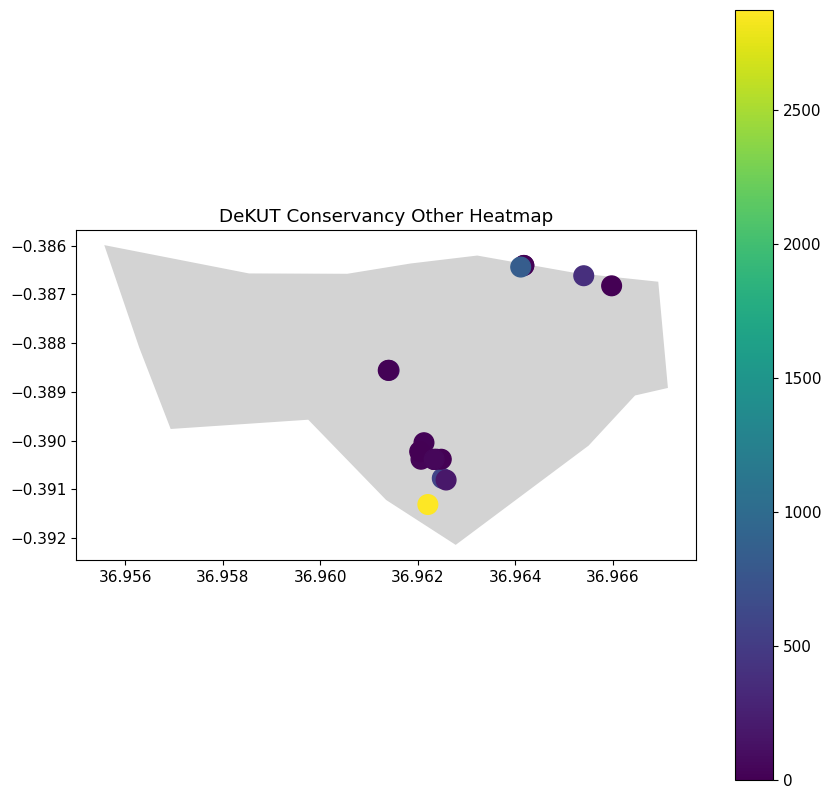

In [65]:
fig, ax = plt.subplots(figsize = (10,10))
dekut_conserv.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df.plot(column = 'Other_count', ax=ax,
            legend = True, 
            markersize = 200)
ax.set_title('DeKUT Conservancy Other Heatmap')
plt.savefig('Other Animals Heat Map')